In [93]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [94]:
import test

In [ ]:
path = "data/tvmarketing.csv"

csvFile = pd.read_csv(path)
print(csvFile)

        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


In [ ]:
print(csvFile.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [ ]:
test.test_load_data(csvFile)

 All tests passed


<Axes: xlabel='TV', ylabel='Sales'>

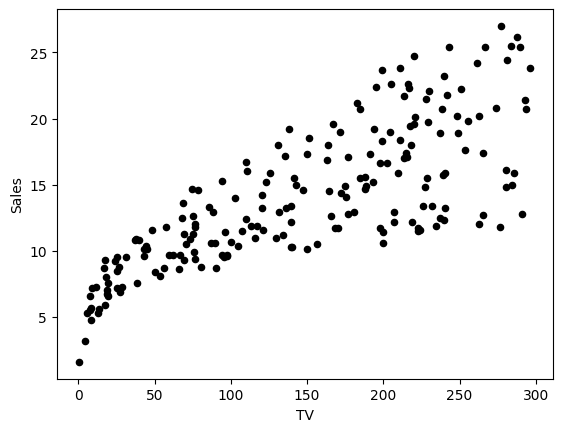

In [98]:
csvFile.plot(x='TV', y='Sales', kind='scatter', c='black')

In [99]:
X = csvFile['TV']
Y= csvFile['Sales']
print(X,Y)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [100]:
w_numpy, b_numpy = np.polyfit(X,Y,1)

print(f"Linear regression with NumPy. Slope: {w_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


In [101]:
def prediction(w,b,X):
    Y = w*X + b 
    return Y

In [102]:
X_prediction = np.array([50,120,280])
Y_prediction = prediction(w_numpy, b_numpy, X_prediction)

print(f"Predicted prices are: {Y_prediction} for data: {X_prediction}")
test.test_pred_numpy(prediction)

Predicted prices are: [ 9.40942557 12.7369904  20.34285287] for data: [ 50 120 280]
 All tests passed


In [103]:
# scikit learn
lr_sklearn = LinearRegression()
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)
    


Shape of X array: (200,)
Shape of Y array: (200,)
Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  3

In [104]:
X_sklearn = np.reshape(X, (X.size,1))
# Y_sklearn = Y[:, np.newaxis]
Y_sklearn = np.reshape(Y, (Y.size,1))

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


In [105]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [ ]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")


In [ ]:
test.test_sklearn_fit(lr_sklearn)

In [ ]:
def prediction_sklearn(X, lr_sklearn):
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)    
    return Y

In [ ]:
Y_pred_sklearn = prediction_sklearn(X_prediction, lr_sklearn)

print(f"TV marketing expenses:\n{X_prediction}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

In [ ]:
test.test_sklearn_predict(pred_sklearn, lr_sklearn)

NameError: name 'X_predictiontion' is not defined

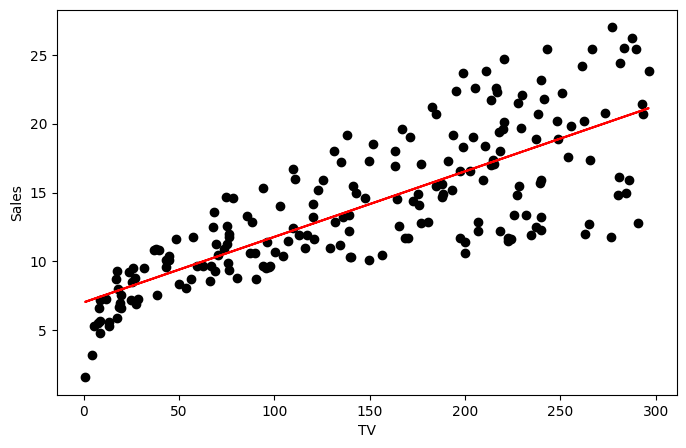

In [107]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_predictiontion, Y_pred_sklearn, 'o', color='blue')

In [108]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [110]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

In [112]:
def dEdm(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Use the following line as a hint, replacing all None.
    res = 1/len(X)*np.dot(m*X + b - Y, X)
    ### END CODE HERE ###
    
    return res
    

def dEdb(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Replace None writing the required expression fully.
    res = 1/len(X)*np.sum((m*X + b - Y))
    ### END CODE HERE ###
    
    return res

In [114]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.687538997430238e-16
0.21777557513839416
5.000000000000001


In [116]:
test.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

 All tests passed


In [118]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        ### START CODE HERE ### (~ 2 lines of code)
        m_new = m - learning_rate*dEdm(m,b,X,Y)
        b_new = b - learning_rate*dEdb(m,b,X,Y)
        ### END CODE HERE ###
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")
        
    return m, b

In [120]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.49460408269589484, -1.367128632523413e-16)
(0.9791767513915026, 4.521910375044022)


In [122]:
test.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

 All tests passed


In [124]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, 
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}") 

Cost after iteration 0: 0.2062999755919659
Cost after iteration 1: 0.19455197461564455
Cost after iteration 2: 0.19408205457659172
Cost after iteration 3: 0.19406325777502959
Cost after iteration 4: 0.1940625059029671
Cost after iteration 5: 0.1940624758280846
Cost after iteration 6: 0.1940624746250893
Cost after iteration 7: 0.19406247457696948
Cost after iteration 8: 0.19406247457504472
Cost after iteration 9: 0.19406247457496772
Cost after iteration 10: 0.19406247457496462
Cost after iteration 11: 0.19406247457496453
Cost after iteration 12: 0.19406247457496453
Cost after iteration 13: 0.19406247457496448
Cost after iteration 14: 0.19406247457496448
Cost after iteration 15: 0.19406247457496448
Cost after iteration 16: 0.19406247457496448
Cost after iteration 17: 0.19406247457496448
Cost after iteration 18: 0.19406247457496448
Cost after iteration 19: 0.19406247457496448
Cost after iteration 20: 0.19406247457496448
Cost after iteration 21: 0.19406247457496448
Cost after iteration 22:

In [125]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]
